In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [2]:
df = pd.read_csv("Customer-Churn-Prediction.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

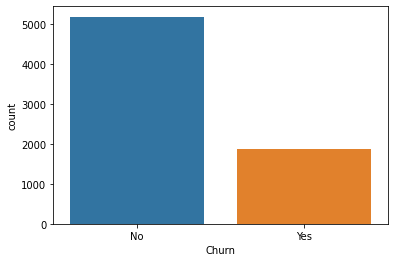

In [6]:
# plot information for visualization
sb.countplot(x=df["Churn"])

In [7]:
churned = df[df.Churn == "Yes"].shape[0]
retained = df[df.Churn == "No"].shape[0]

In [8]:
print(churned)
print(retained)

1869
5174


In [9]:
# Customer left the company
ch_per = (churned / (churned+retained) * 100)
ch_per

26.536987079369588

In [10]:
# Customer Stayed the company
re_per = (retained / (churned+retained) * 100)
re_per


73.4630129206304

In [11]:
# check null value
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162289,32.370865,64.761692
std,0.368742,24.559231,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


<AxesSubplot:xlabel='gender', ylabel='count'>

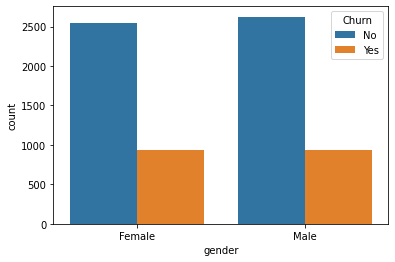

In [13]:
# simplw visualization

sb.countplot(x="gender",hue="Churn",data=df)

In [14]:
df["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<AxesSubplot:xlabel='MultipleLines', ylabel='count'>

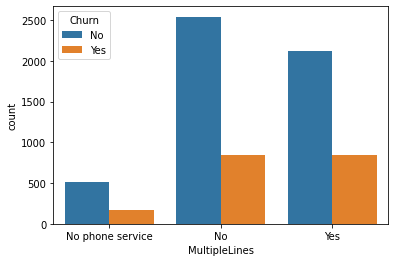

In [15]:
sb.countplot(x="MultipleLines",hue="Churn",data=df)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

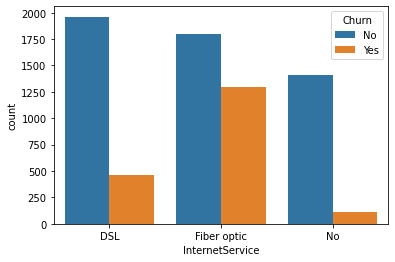

In [16]:
sb.countplot(x="InternetService",hue="Churn",data=df)

In [17]:
# data preprocessing
df = df.drop("customerID",axis=1)

In [18]:
df.shape

(7043, 20)

In [19]:
# handle categorical value
# feature encoding
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-19-078f95fe622f>:4: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [20]:
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


In [21]:
featurs = df.iloc[:,:-1]
label = df.iloc[:,-1]
featurs.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [22]:
label

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [23]:
# feature selection
featurs_x = SelectKBest(score_func=f_classif)

In [24]:
featurs_x.fit(featurs,label)

SelectKBest()

In [25]:
col_name = pd.DataFrame(featurs.columns,columns=["Featurs name"])
col_name.head()

,Featurs name
0,gender
1,SeniorCitizen
2,Partner
3,Dependents
4,tenure


In [26]:
score_col = pd.DataFrame(featurs_x.scores_,columns=["Score"])

In [27]:
top_featurs = pd.concat([col_name,score_col],axis=1)
top_featurs

,Featurs name,Score
0,gender,0.522257
1,SeniorCitizen,165.351314
2,Partner,163.060036
3,Dependents,195.149314
4,tenure,997.415586
5,PhoneService,1.004266
6,MultipleLines,10.201712
7,InternetService,15.782320
8,OnlineSecurity,643.162019
9,OnlineBackup,279.877370


In [28]:
most_important_featurs = top_featurs.nlargest(n=15,columns="Score")
most_important_featurs

,Featurs name,Score
14,Contract,1315.088872
4,tenure,997.415586
8,OnlineSecurity,643.162019
11,TechSupport,610.610024
9,OnlineBackup,279.877370
17,MonthlyCharges,273.463704
15,PaperlessBilling,268.985218
10,DeviceProtection,230.744618
3,Dependents,195.149314
1,SeniorCitizen,165.351314


In [29]:
most_important_featurs.sort_index(axis=0,inplace=True)

In [30]:
most_important_featurs


,Featurs name,Score
1,SeniorCitizen,165.351314
2,Partner,163.060036
3,Dependents,195.149314
4,tenure,997.415586
6,MultipleLines,10.201712
7,InternetService,15.782320
8,OnlineSecurity,643.162019
9,OnlineBackup,279.877370
10,DeviceProtection,230.744618
11,TechSupport,610.610024


In [31]:
featurs = featurs.drop(["gender","PhoneService","StreamingTV","TotalCharges"],axis = 1)

In [32]:
featurs

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,1,0,1,1,0,0,2,0,0,0,0,1,2,29.85
1,0,0,0,34,0,0,2,0,2,0,0,1,0,3,56.95
2,0,0,0,2,0,0,2,2,0,0,0,0,1,3,53.85
3,0,0,0,45,1,0,2,0,2,2,0,1,0,0,42.30
4,0,0,0,2,0,1,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,2,0,2,0,2,2,2,1,1,3,84.80
7039,0,1,1,72,2,1,0,2,2,0,2,1,1,1,103.20
7040,0,1,1,11,1,0,2,0,0,0,0,0,1,2,29.60
7041,1,1,0,4,2,1,0,0,0,0,0,0,1,3,74.40


In [41]:
# Scalling the featurs
featurs = StandardScaler().fit_transform(featurs)
featurs

array([[-0.44014635,  1.03453023, -0.65401193, ...,  0.8297975 ,
         0.39855772, -1.16032292],
       [-0.44014635, -0.96662231, -0.65401193, ..., -1.20511329,
         1.33486261, -0.25962894],
       [-0.44014635, -0.96662231, -0.65401193, ...,  0.8297975 ,
         1.33486261, -0.36266036],
       ...,
       [-0.44014635,  1.03453023,  1.5290241 , ...,  0.8297975 ,
         0.39855772, -1.1686319 ],
       [ 2.27197156,  1.03453023, -0.65401193, ...,  0.8297975 ,
         1.33486261,  0.32033821],
       [-0.44014635, -0.96662231, -0.65401193, ...,  0.8297975 ,
        -1.47405205,  1.35896134]])

In [42]:
featurs.shape

(7043, 15)

In [43]:
xtrain,xtest,ytrain,ytest = train_test_split(featurs,label,test_size=0.25,random_state=45)

In [44]:
xtrain

array([[-0.44014635,  1.03453023,  1.5290241 , ...,  0.8297975 ,
        -1.47405205,  1.47694892],
       [-0.44014635, -0.96662231, -0.65401193, ..., -1.20511329,
        -0.53774716, -0.50058951],
       [-0.44014635, -0.96662231, -0.65401193, ...,  0.8297975 ,
        -1.47405205,  0.45826736],
       ...,
       [-0.44014635,  1.03453023,  1.5290241 , ...,  0.8297975 ,
         0.39855772,  0.62610886],
       [-0.44014635, -0.96662231, -0.65401193, ...,  0.8297975 ,
         0.39855772,  0.18240906],
       [-0.44014635, -0.96662231, -0.65401193, ..., -1.20511329,
        -1.47405205, -1.47938794]])

In [45]:
# Model building
logistic_model = LogisticRegression().fit(xtrain,ytrain)

In [46]:
predict_value = logistic_model.predict(xtest)
predict_value

array([0, 0, 0, ..., 0, 0, 1])

In [47]:
# Accuracy Score
accuracy_scores = accuracy_score(y_true=ytest,y_pred=predict_value)
print(round(accuracy_scores,2)*100,"%")

81.0 %


In [48]:
# confisuion metrics
confusion_matrix(y_true=ytest,y_pred=predict_value)

array([[1175,  132],
       [ 202,  252]], dtype=int64)

In [49]:
print(classification_report(y_true=ytest,y_pred=predict_value))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1307
           1       0.66      0.56      0.60       454

    accuracy                           0.81      1761
   macro avg       0.75      0.73      0.74      1761
weighted avg       0.80      0.81      0.80      1761



In [50]:
logistic_model.score(xtest,ytest)

0.8103350369108461